<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/DS_exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 6

**Name:** Rishi Kaul

**UID:** 2018130019

**Objective:**
To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations, and forecasting

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/gdrive/MyDrive/Datasets/AirPassengers.csv")

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We can see that the data contains a column labeled “Month” that contains dates. In that column, the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled “#Passengers,” and it contains the number of passengers for the year–month. After Taking a look at the last five records the data using the tail() method, we see that the data ends in 1960.

Now converting month column to date time object using pd.date_time



In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [ ]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df['Month-Year'] = df['Month'].dt.strftime('%b')
for i in range(144):
  df['Month-Year'][i] = df['Month-Year'][i] + ", " +str(df['Month'][i].year)
df['Month-Year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      Jan, 1949
1      Feb, 1949
2      Mar, 1949
3      Apr, 1949
4      May, 1949
         ...    
139    Aug, 1960
140    Sep, 1960
141    Oct, 1960
142    Nov, 1960
143    Dec, 1960
Name: Month-Year, Length: 144, dtype: object

The next thing we can do is convert the month column to an index. This will allow me to more easily work with some of the packages later:

In [ ]:
df.index = df['Month']

del df['Month']



In [ ]:
df.head()

,#Passengers,Month-Year
Month,,
1949-01-01,112,"Jan, 1949"
1949-02-01,118,"Feb, 1949"
1949-03-01,132,"Mar, 1949"
1949-04-01,129,"Apr, 1949"
1949-05-01,121,"May, 1949"


Now I'll visualise the time series data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of passengers')

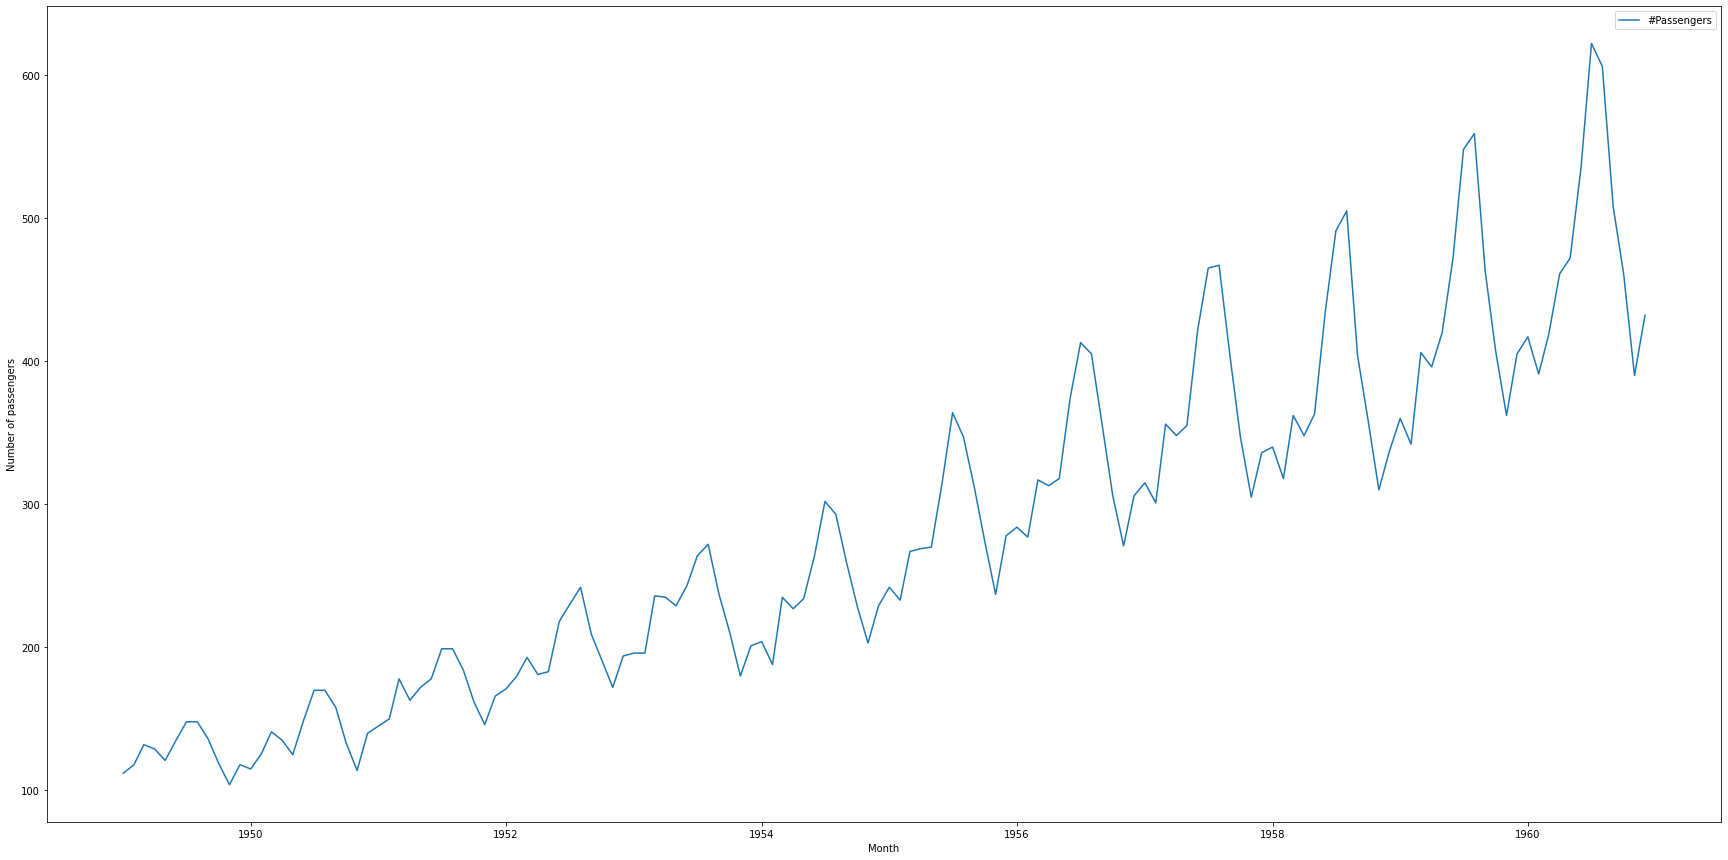

In [ ]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df)
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

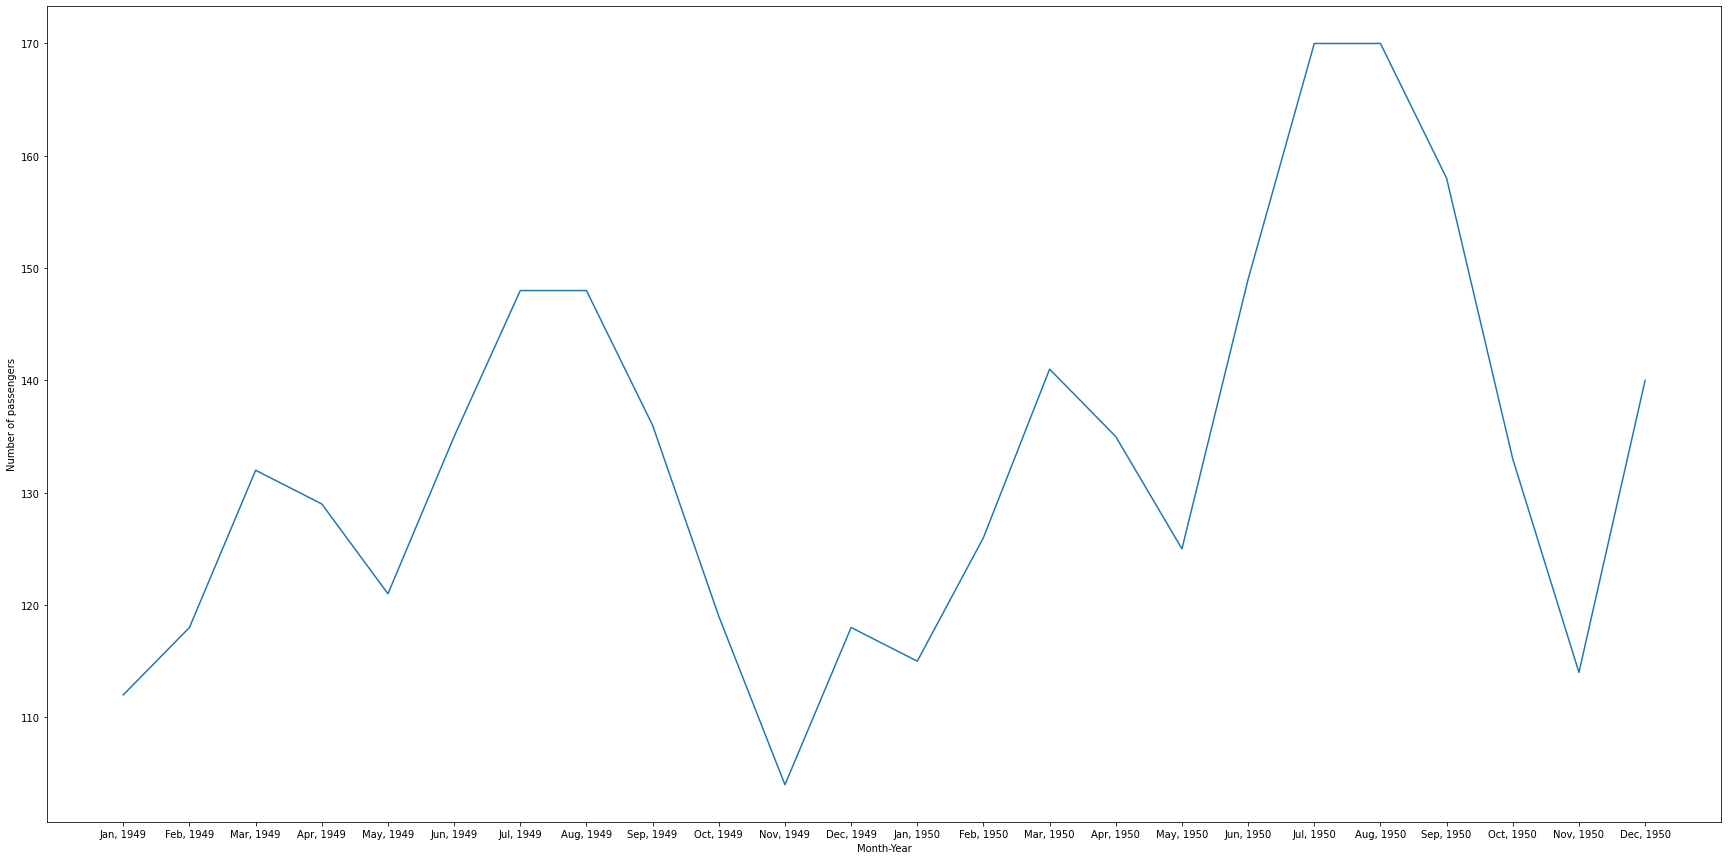

In [ ]:
plt.figure(figsize=(30,15))
sns.lineplot(x=df['Month-Year'][:24],y = df['#Passengers'][:24], data=df)
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

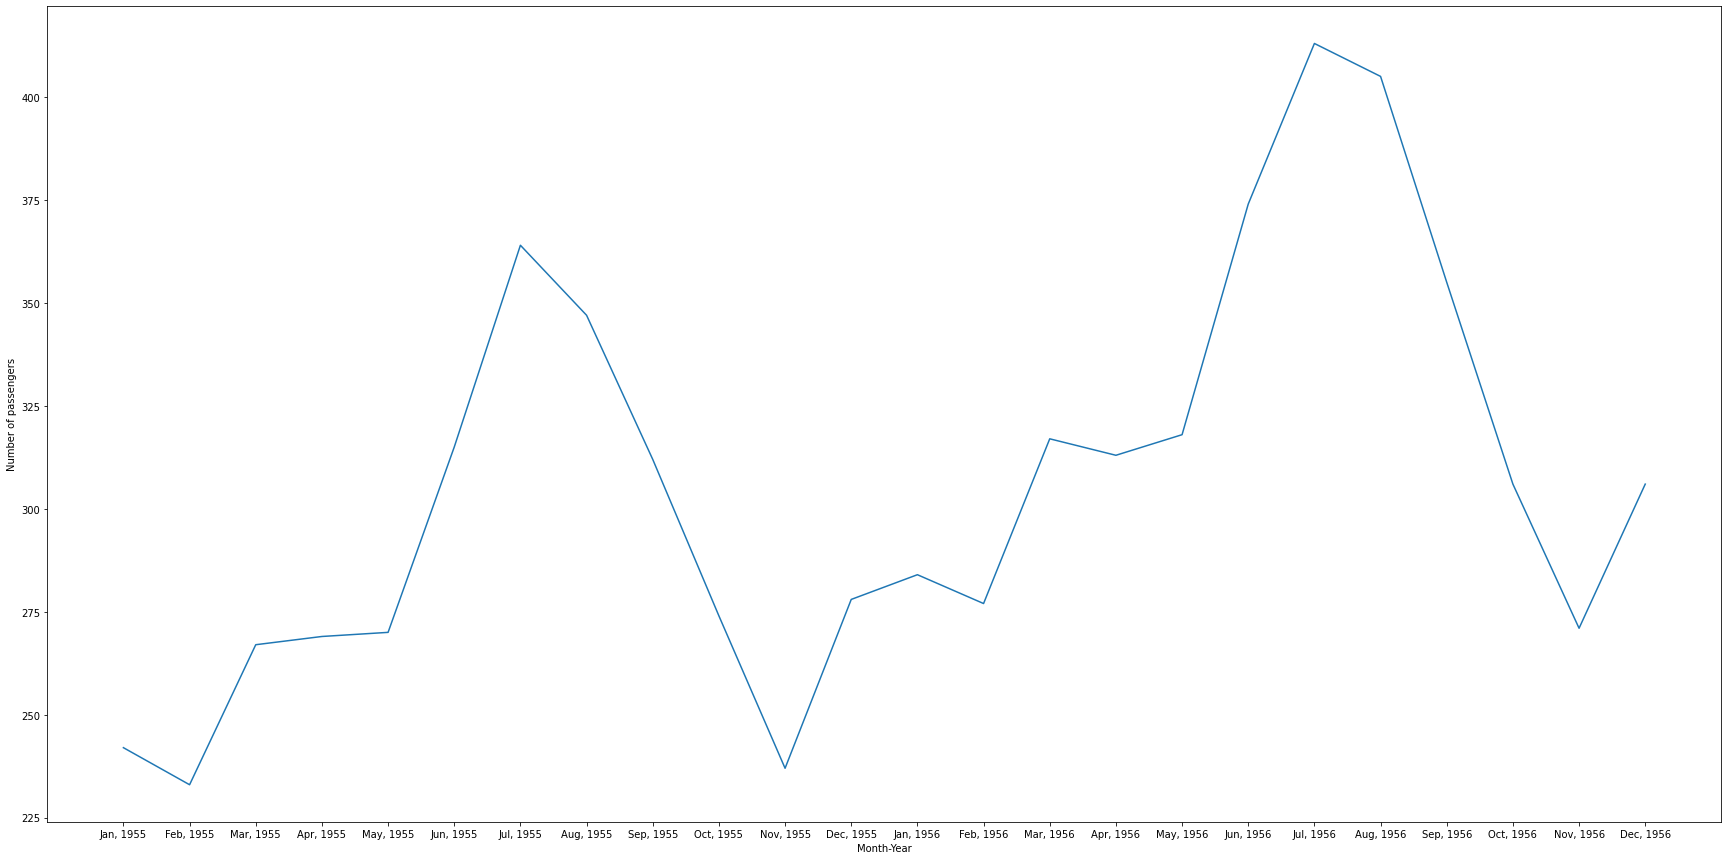

In [ ]:
plt.figure(figsize=(30,15))
sns.lineplot(x=df['Month-Year'][72:96],y = df['#Passengers'][72:96], data=df)
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

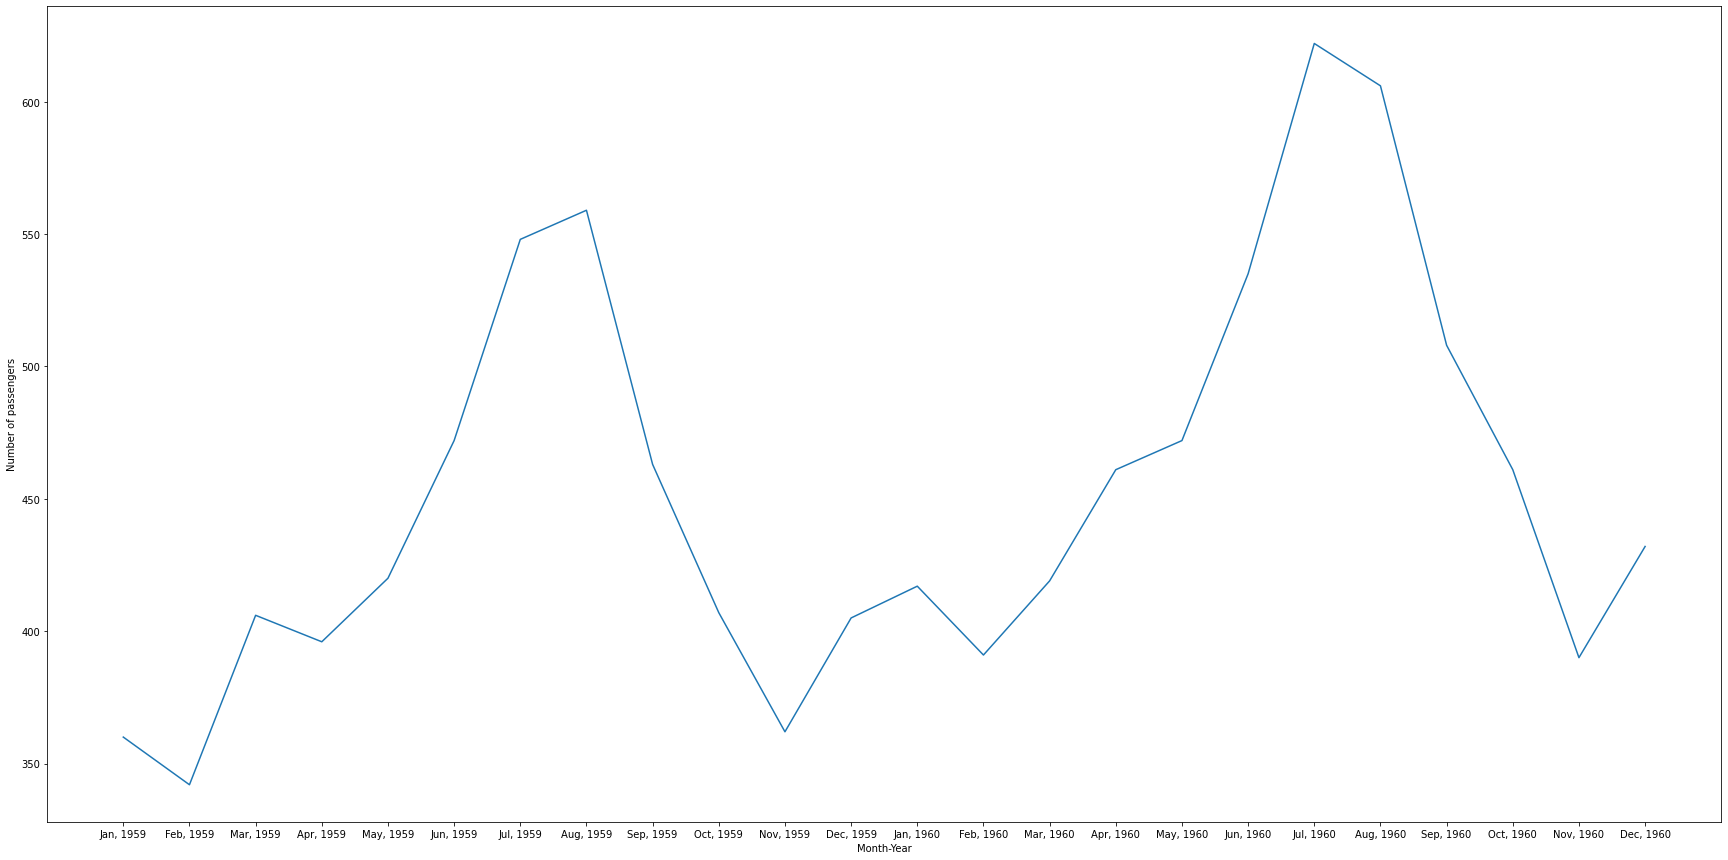

In [ ]:
plt.figure(figsize=(30,15))
sns.lineplot(x=df['Month-Year'][120:144],y = df['#Passengers'][120:144], data=df)
plt.ylabel("Number of passengers")

From the above 3 graphs, I visualised that air travel hits a low in the month of November and July to September are the high months. This represents a seasonal trend in the data. However, the data is not stationary because Year on Year there is increase in number of passengers which is evident in the overall rise of highs and lows.

In [ ]:
df.drop('Month-Year', inplace=True, axis=1)

In [ ]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

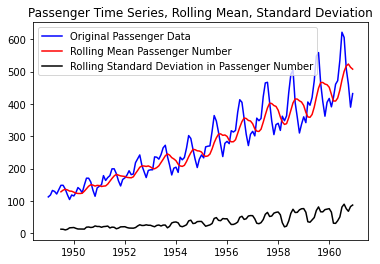

In [ ]:
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc='best')

Stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. I have used Dickey Fuller test to check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adft = adfuller(df['#Passengers'], autolag="AIC")

In [ ]:
output_df = pd.DataFrame({'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , 'Metric':['Test Statistics','p-value','No. of lags used','Number of observations used',
'critical value (1%)', 'critical value (5%)', 'critical value (10%)']})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


It is visbile that the data is not stationary from the fact that the p-value is greater than 5 percent and the test statistic is greater than the critical value. These conclusions can also be drawn from inspecting the data, as we see a clear, increasing trend in the number of passengers.

Now I'll check for Autocorrelation

It is a measure of how correlated time series data is at a given point in time with past values

If the passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.

In [ ]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498523


In [ ]:
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print('Three Month Lag: ', autocorrelation_lag3)
autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print('Six Month Lag: ', autocorrelation_lag6)
autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print('Nine Month Lag: ', autocorrelation_lag9)

Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167601


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

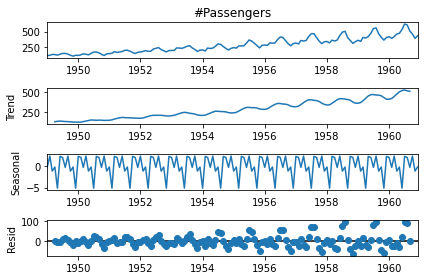

In [ ]:
decompose = seasonal_decompose(df['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

From this plot, we can clearly see the increasing trend in number of passengers and the seasonality patterns in the rise and fall in values each year.

**Forecasting**

In [ ]:
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


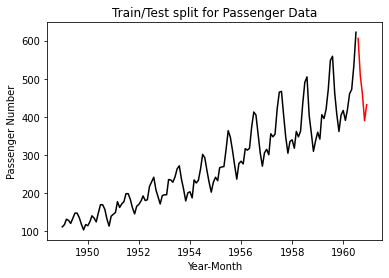

In [ ]:
df['Date'] = df.index
train = df[df['Date'] < datetime.strptime('1960-08-01','%Y-%m-%d')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= datetime.strptime('1960-08-01','%Y-%m-%d')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.title('Train/Test split for Passenger Data')
plt.ylabel('Passenger Number')
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print('RMSE: ', rms)

RMSE:  61.36470008138933


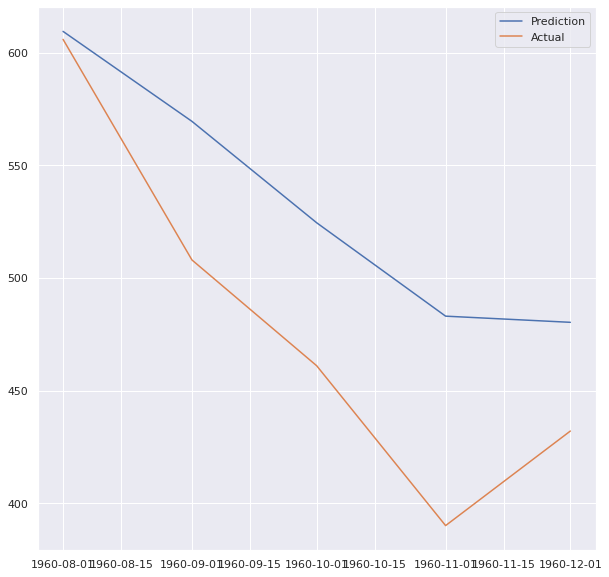

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(test.index, forecast['Prediction'], label = "Prediction")
plt.plot(test.index, test['test'], label = "Actual")
plt.legend()
plt.show()

# Conclusion
Through this experiment, I have performed time series analysis and forecasting on airline passenger dataset. I implemented several graphs for analysing the data whether it is stationary or seasonal. The data had a upward trend and was seasonal owing to several factors related to travel. After analysing, I applied forecasting models
